Original source for majority of the code below is d2l.ai, but some codes are modified to make them fit better to the class contents and be independent of the d2l library for better understanding of the coding principles.

Dr. Ulya Bayram

In [1]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    plt.figure(figsize=(6, 4))
    plt.plot(f_line, [f(x) for x in f_line], '-', label='f(x)')
    plt.plot(results, [f(x) for x in results], 'x', label='f(x)', linestyle='None')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

In [3]:
#@ save
def train_2d(trainer, steps=20, f_grad=None):  
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used in Momentum, adagrad, RMSProp
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):
    """Show the trace of 2D variables during optimization."""
    plt.figure(figsize=(6, 4))
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1), torch.arange(-3.0, 1.0, 0.1))
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

# Stochastic Gradient Descent

/shared-libs/python3.9/py/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


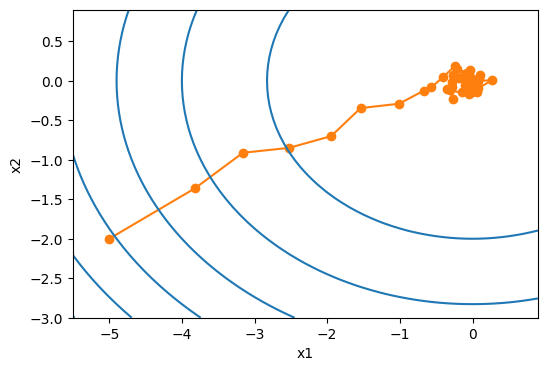

In [4]:
def f(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # Gradient of the objective function
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad, lr, eta):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # Constant learning rate

results = []
x1, x2, _, _ = -5, -2, 0, 0
for i in range(50):
    results.append([x1, x2])
    x1, x2, _, _ = sgd(x1, x2, 0, 0, f_grad, lr, eta)

show_trace_2d(f, results)

## Dynamic Learning Rate

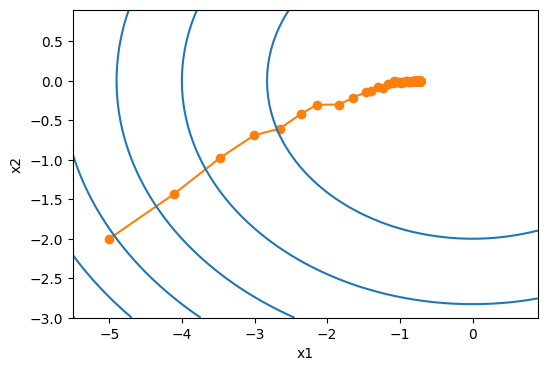

In [5]:
import math

def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr

results = []
x1, x2, _, _ = -5, -2, 0, 0
for i in range(1000):
    results.append([x1, x2])
    x1, x2, _, _ = sgd(x1, x2, 0, 0, f_grad, lr, eta)

show_trace_2d(f, results)

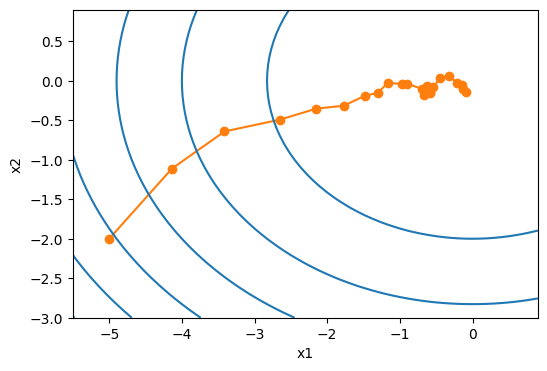

In [3]:
def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
results = []
x1, x2, _, _ = -5, -2, 0, 0
for i in range(25):
    results.append([x1, x2])
    x1, x2, _, _ = sgd(x1, x2, 0, 0, f_grad, lr, eta)

show_trace_2d(f, results)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=700e962d-3fcf-4c82-8c8d-f1f2cc26fdf7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>